In [ ]:
try :
  # % tensorflow_version only exists in Colab .
  % tensorflow_version 2. x
except Exception:
  pass

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2. x`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [ ]:
import tensorflow as tf
tf . test . gpu_device_name ()

'/device:GPU:0'

In [ ]:
from tensorflow . python . client import device_lib
device_lib . list_local_devices ()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 5337039753962835220, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14674281152
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 4275354295371609057
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

In [ ]:
!cat /proc/meminfo

MemTotal:       13333568 kB
MemFree:         9680572 kB
MemAvailable:   12075296 kB
Buffers:           83984 kB
Cached:          2312476 kB
SwapCached:            0 kB
Active:          1244840 kB
Inactive:        1991992 kB
Active(anon):     656276 kB
Inactive(anon):    10604 kB
Active(file):     588564 kB
Inactive(file):  1981388 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               628 kB
Writeback:             0 kB
AnonPages:        840328 kB
Mapped:           548532 kB
Shmem:             11256 kB
Slab:             181580 kB
SReclaimable:     131120 kB
SUnreclaim:        50460 kB
KernelStack:        4260 kB
PageTables:         7948 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6666784 kB
Committed_AS:    3509988 kB
VmallocTotal:   34359738367 kB
VmallocUsed:           0 kB
VmallocChunk:          0 kB
Percpu:             1048 kB
AnonHugePages:   

In [ ]:
!cat /proc/cpuinfo


processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 b

#Exe. 1 Load the CIFAR-10 dataset from Keras


In [ ]:
from tensorflow import keras
data = keras.datasets.cifar10
cifar10_data = data.load_data()

170500096/170498071 [==============================] - 2s 0us/step


#Exe. 2 Convert train and test X values to float32 and normalize data between range 0.0 and 1.0.
(Since that the pixel values fall in the range of 0 to 255,
normalise train and test sets.)


In [ ]:
(train_X,train_y) ,(test_X,test_y) = cifar10_data
train_X

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [ ]:
# Normalize the X train and test data
import numpy as np
X_train = np.float32(train_X) / 255.0
X_test = np.float32(test_X)/255.0
print(X_train)
print(X_test)

[[[[0.23137255 0.24313726 0.24705882]
   [0.16862746 0.18039216 0.1764706 ]
   [0.19607843 0.1882353  0.16862746]
   ...
   [0.61960787 0.5176471  0.42352942]
   [0.59607846 0.49019608 0.4       ]
   [0.5803922  0.4862745  0.40392157]]

  [[0.0627451  0.07843138 0.07843138]
   [0.         0.         0.        ]
   [0.07058824 0.03137255 0.        ]
   ...
   [0.48235294 0.34509805 0.21568628]
   [0.46666667 0.3254902  0.19607843]
   [0.47843137 0.34117648 0.22352941]]

  [[0.09803922 0.09411765 0.08235294]
   [0.0627451  0.02745098 0.        ]
   [0.19215687 0.10588235 0.03137255]
   ...
   [0.4627451  0.32941177 0.19607843]
   [0.47058824 0.32941177 0.19607843]
   [0.42745098 0.28627452 0.16470589]]

  ...

  [[0.8156863  0.6666667  0.3764706 ]
   [0.7882353  0.6        0.13333334]
   [0.7764706  0.6313726  0.10196079]
   ...
   [0.627451   0.52156866 0.27450982]
   [0.21960784 0.12156863 0.02745098]
   [0.20784314 0.13333334 0.07843138]]

  [[0.7058824  0.54509807 0.3764706 ]
   [0.6

In [ ]:
X_train.shape, train_y.shape, X_test.shape, test_y.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

#Exe. 3 Define a network model (NET I) with the following architecture:
CONV − P OOL − CONV − P OOL − CONV − P OOL − F C − F C

In [ ]:
from keras . layers import Dense , Conv2D , Flatten , MaxPooling2D
model = keras.Sequential ([
keras.layers.Conv2D(filters=32, kernel_size = 3, activation = 'relu', input_shape =(32,32,3)),
keras.layers.MaxPooling2D( pool_size =(2,2), strides =2, padding ='same'),
keras.layers.Conv2D(filters = 64, kernel_size = 3, activation='relu', padding='same'),
keras.layers.MaxPooling2D(pool_size = (2,2), strides = 2, padding='same'),
keras.layers.Conv2D(filters = 64, kernel_size = 3, activation='relu', padding='same'),
keras.layers.MaxPooling2D(pool_size = (2,2), strides = 2, padding='same'),
# Flatten output of the previous layer
keras.layers.Flatten(),
keras.layers.Dense(512, activation='relu'),
keras.layers.Dense(10, activation='softmax')
]) 

#Exe. 4 The number of parameters in a convolutional layer is given by:
Pn = [(m × n × Ci) + 1] × Co

Pn= ((shape of width of the filter * shape of height of the filter * number of filters in the previous layer+1)*number of filters).

On = ((N − F)/S)+ 1

where N is the input dimension and F is the filter dimension similar to m × n :
m = n = F, and S is the filter stride length.

compute the Pn and On of your network and verify your calculation by printing
model.summary().


In [ ]:
p1=((3*3*3)+1)*32
p2=((3*3*32)+1)*64  # filter in current layer = 64 and previous layer = 32, kernel size= 3x3
p3=((3*3*64)+1)*64
dense= ((512*1024)+1*512)
dense_1=(10*512)+(1*10)
print("p1",p1)
print("p2",p2)
print("p3",p3)
print("dense",dense)
print("dense_1",dense_1)
print("total",p1+p2+p3+dense+dense_1)
o1=(32-3)+1
o1

p1 896
p2 18496
p3 36928
dense 524800
dense_1 5130
total 586250


30

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0

#Exe. 5 Compile the model with an adam optimizer and a sparse categorical
crossentropy loss function.

In [ ]:
model.compile(optimizer ='adam',
loss ='sparse_categorical_crossentropy',
metrics =['accuracy'])

#Exe. 6 Train the model with 20% of validation data with 128 batches and 20
epochs. Save the fitting result in a variable called history

In [ ]:
history=model.fit(X_train, train_y, validation_split=0.2, epochs =20,batch_size=128)

Epoch 1/20
313/313 [==============================] - 35s 9ms/step - loss: 1.8103 - accuracy: 0.3365 - val_loss: 1.2677 - val_accuracy: 0.5508
Epoch 2/20
313/313 [==============================] - 2s 7ms/step - loss: 1.2074 - accuracy: 0.5665 - val_loss: 1.0805 - val_accuracy: 0.6269
Epoch 3/20
313/313 [==============================] - 2s 7ms/step - loss: 1.0165 - accuracy: 0.6412 - val_loss: 0.9946 - val_accuracy: 0.6555
Epoch 4/20
313/313 [==============================] - 2s 7ms/step - loss: 0.8815 - accuracy: 0.6877 - val_loss: 0.9264 - val_accuracy: 0.6783
Epoch 5/20
313/313 [==============================] - 2s 7ms/step - loss: 0.7729 - accuracy: 0.7288 - val_loss: 0.8319 - val_accuracy: 0.7162
Epoch 6/20
313/313 [==============================] - 2s 7ms/step - loss: 0.6934 - accuracy: 0.7588 - val_loss: 0.8216 - val_accuracy: 0.7164
Epoch 7/20
313/313 [==============================] - 2s 7ms/step - loss: 0.6161 - accuracy: 0.7865 - val_loss: 0.8233 - val_accuracy: 0.7163
Epoch

#Exe. 7 After fitting the model, evaluate it on the test set using model.evaluate().
Print accuracy and loss of the evaluated model on the test set.

In [ ]:
test_loss, test_acc = model.evaluate(X_test , test_y)
print("Accuracy:- ",test_acc)
print("Loss:- ",test_loss)

313/313 [==============================] - 1s 2ms/step - loss: 1.6132 - accuracy: 0.7111
Accuracy:-  0.7110999822616577
Loss:-  1.6131807565689087


#Exe. 8 As a test, predict the test dataset using model.predict(), and check
if the predicted image label is the same as the real label for the first image of
the test set.

In [ ]:
predictions = model.predict (X_test)
predictions

array([[3.8783230e-09, 1.4435989e-08, 1.1545087e-07, ..., 6.5255960e-11,
        2.6400706e-08, 4.1449177e-10],
       [3.1766325e-05, 9.3423921e-08, 8.3268161e-18, ..., 2.2389422e-20,
        9.9996817e-01, 4.4381832e-10],
       [2.0719653e-01, 3.5419025e-06, 6.9865713e-08, ..., 6.6145638e-08,
        7.9268235e-01, 1.1690754e-04],
       ...,
       [1.7065559e-15, 1.9687767e-18, 2.0440499e-08, ..., 4.4654203e-10,
        7.3523083e-11, 3.3204851e-16],
       [5.9546284e-07, 9.9999070e-01, 2.1128763e-09, ..., 2.0393510e-11,
        3.2190471e-14, 1.7900580e-13],
       [4.6480310e-14, 7.2115443e-14, 7.7247486e-11, ..., 9.9999750e-01,
        2.8836853e-13, 1.0930679e-12]], dtype=float32)

In [ ]:
print(predictions[0])
for i in range(3):
  print("predicted label for element",i,":",np.argmax(predictions[i]))

[3.8783230e-09 1.4435989e-08 1.1545087e-07 8.4925389e-01 8.5126745e-10
 1.5074532e-01 6.9375506e-07 6.5255960e-11 2.6400706e-08 4.1449177e-10]
predicted label for element 0 : 3
predicted label for element 1 : 8
predicted label for element 2 : 8


#Exe. 9 Using the history saved in Exe. 6, demonstrate the ’accuracy’ (train accuracy changing), versus ’val accuracy’

In [ ]:
history.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

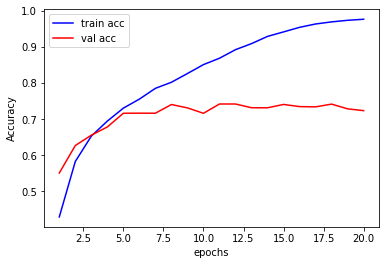

In [ ]:
import matplotlib.pyplot as plt
epochs = range(1,21)
plt.plot(epochs, history.history['accuracy'],'b',label='train acc')
plt.plot(epochs, history.history['val_accuracy'],'r', label='val acc')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

We can see there is a deviation in curves from epoch 4, accuracy curve for validation set is lower than train after epoch 3

#Exe. 10 Similar to the previous Exe., demonstrate the training loss (’loss’)
versus the validation loss (’val loss’) w.r.t the epochs evolutions. What are
your observations? After how many epochs, the overfitting happens?

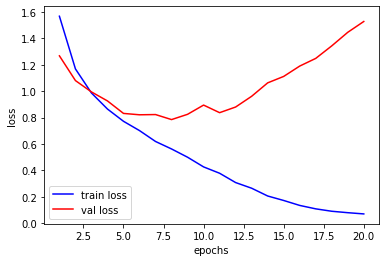

In [ ]:
plt.plot(epochs, history.history['loss'],'b',label='train loss')
plt.plot(epochs, history.history['val_loss'],'r', label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

We can see there is a deviation in curves from epoch 4, loss curve for validation set is higher than train after epoch 3

Thus model is overfitting after 3rd epoch

#Exe. 11 Define a new model (NET II) with higher filter/kernel size (filter size:
5 * 5) as below:
CNV − CONV − P OOL − CONV − P OOL − F C − F C

In [ ]:
from keras . layers import Dense , Conv2D , Flatten , MaxPooling2D
model2 = keras.Sequential ([
keras.layers.Conv2D(filters=32, kernel_size = 5, activation = 'relu', input_shape =(32,32,3)),
keras.layers.Conv2D(filters = 64, kernel_size = 5, activation='relu', padding='same'),
keras.layers.MaxPooling2D(pool_size = (2,2), strides = 2, padding='same'),
keras.layers.Conv2D(filters = 64, kernel_size = 5, activation='relu', padding='same'),
keras.layers.MaxPooling2D(pool_size = (2,2), strides = 2, padding='same'),
# Flatten output of the previous layer
keras.layers.Flatten(),
keras.layers.Dense(512, activation='relu'),
keras.layers.Dense(10, activation='softmax')
]) 

#Exe. 12 Print the summary of this model, check the number of parameters
using the formula given in Exe. 4.

In [ ]:
p1=((5*5*3)+1)*32
p2=((5*5*32)+1)*64  # filter in current layer = 64 and previous layer = 32, kernel size= 3x3
p3=((5*5*64)+1)*64
dense= ((512*3136)+1*512)
dense_1=(10*512)+(1*10)
print("p1",p1)
print("p2",p2)
print("p3",p3)
print("dense",dense)
print("dense_1",dense_1)
print("total",p1+p2+p3+dense+dense_1)


p1 2432
p2 51264
p3 102464
dense 1606144
dense_1 5130
total 1767434


In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        2432      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 64)        51264     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        102464    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)              

#Exe. 13 Compile the model with the same parameters of Exe. 5

In [ ]:
model2.compile(optimizer ='adam',
loss ='sparse_categorical_crossentropy',
metrics =['accuracy'])

#Exe. 14 Fit the model same as Exe. 6. Do not forget to save it as history in the same time.


In [ ]:
history2=model2.fit(X_train, train_y, validation_split=0.2, epochs =20,batch_size=128)

Epoch 1/20
313/313 [==============================] - 5s 13ms/step - loss: 1.7662 - accuracy: 0.3520 - val_loss: 1.1932 - val_accuracy: 0.5767
Epoch 2/20
313/313 [==============================] - 4s 12ms/step - loss: 1.1201 - accuracy: 0.6031 - val_loss: 1.0511 - val_accuracy: 0.6186
Epoch 3/20
313/313 [==============================] - 4s 12ms/step - loss: 0.8755 - accuracy: 0.6935 - val_loss: 0.8723 - val_accuracy: 0.6949
Epoch 4/20
313/313 [==============================] - 4s 12ms/step - loss: 0.7036 - accuracy: 0.7535 - val_loss: 0.8273 - val_accuracy: 0.7208
Epoch 5/20
313/313 [==============================] - 4s 12ms/step - loss: 0.5366 - accuracy: 0.8136 - val_loss: 0.8242 - val_accuracy: 0.7298
Epoch 6/20
313/313 [==============================] - 4s 12ms/step - loss: 0.3861 - accuracy: 0.8674 - val_loss: 0.8865 - val_accuracy: 0.7160
Epoch 7/20
313/313 [==============================] - 4s 12ms/step - loss: 0.2723 - accuracy: 0.9082 - val_loss: 0.9971 - val_accuracy: 0.7258

#Exe. 15 Evaluate the model on test dataset and test a first image of test set
as Exe. 8

In [ ]:
test_loss, test_acc = model2.evaluate(X_test , test_y)
print("Accuracy:- ",test_acc)
print("Loss:- ",test_loss)

313/313 [==============================] - 1s 3ms/step - loss: 2.2567 - accuracy: 0.6957
Accuracy:-  0.6956999897956848
Loss:-  2.256686210632324


In [ ]:
predictions2=model2.predict(X_test)
predictions2


array([[4.4955931e-11, 9.1324323e-11, 5.5413562e-13, ..., 1.4260053e-12,
        1.8731417e-07, 3.2647343e-14],
       [1.5273696e-04, 5.7404470e-02, 6.4789951e-18, ..., 3.5382877e-24,
        9.4242668e-01, 1.6095133e-05],
       [1.5058452e-02, 3.1161599e-03, 1.1201718e-06, ..., 7.4128133e-07,
        9.6452653e-01, 1.7296644e-02],
       ...,
       [2.2289186e-17, 1.8743036e-18, 3.1082892e-09, ..., 8.7741536e-11,
        1.6338820e-16, 8.3061424e-18],
       [1.4611594e-04, 9.9832088e-01, 1.7390933e-07, ..., 6.0314592e-12,
        2.0939230e-13, 3.0333206e-06],
       [6.3283538e-21, 2.4670349e-19, 5.2517387e-20, ..., 1.0000000e+00,
        3.0928410e-21, 5.6030003e-20]], dtype=float32)

In [ ]:
print(predictions2[0])
for i in range(3):
  print("predicted label for element",i,":",np.argmax(predictions2[i]))

[4.4955931e-11 9.1324323e-11 5.5413562e-13 1.7702228e-01 2.0438762e-10
 8.2293373e-01 4.3801188e-05 1.4260053e-12 1.8731417e-07 3.2647343e-14]
predicted label for element 0 : 5
predicted label for element 1 : 8
predicted label for element 2 : 8


#Exe. 16 Similar to Exes 9 and 10, demonstrate how the loss and accuracy
change for the training and validation according to epochs? What are your observations? how is the overfitting now? after how many epochs happens? How
is the deviation between training and validation in comparison to NET I model?

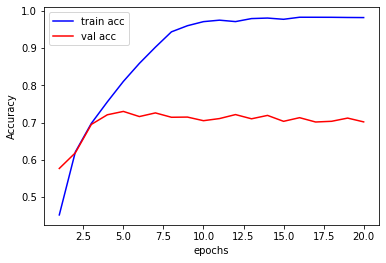

In [ ]:
plt.plot(epochs, history2.history['accuracy'],'b',label='train acc')
plt.plot(epochs, history2.history['val_accuracy'],'r', label='val acc')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

We can observe that from epoch 4, train accuracy starts increasing as compared to validation accuracy. So, there is overfitting after epoch 3. 



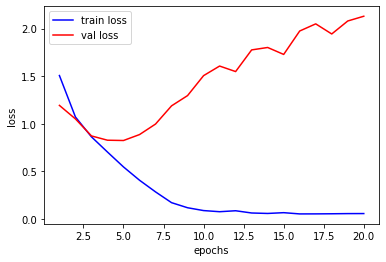

In [ ]:
plt.plot(epochs, history2.history['loss'],'b',label='train loss')
plt.plot(epochs, history2.history['val_loss'],'r', label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

We can observe that from epoch 4, train loss starts decreasing as compared to validation loss. So, there is overfitting after epoch 3. 



As compared to model 1, model 2 has sligtly less accuracy and more loss. So, the model1 with small filter size (3x3) is better than model 2 with (5x5)

#Exe. 17 Define a deeper model (NET III) as an improvement of NET I and NET II:
CONV −CONV −P OOL−CONV −P OOL−CONV −CONV −CONV −P OOL−F C−F C−F C

In [ ]:
from keras import regularizers
model3 = keras.Sequential ([
keras.layers.Conv2D(filters=96, kernel_size = 3, strides = 1,activation = 'relu', input_shape =(32,32,3)),
keras.layers.Conv2D(filters = 96, kernel_size = 3,strides = 1, activation='relu', padding='same'),
keras.layers.MaxPooling2D(pool_size = (2,2), strides = 2, padding='same'),
#Drop out
keras.layers.Dropout(0.5),
keras.layers.Conv2D(filters = 128, kernel_size = 3,strides = 1, activation='relu', padding='same'),
keras.layers.MaxPooling2D(pool_size = (2,2), strides = 2, padding='same'),
# Drop out
keras.layers.Dropout(0.5),
keras.layers.Conv2D(filters = 128, kernel_size = 3, strides = 1,activation='relu', padding='same'),
keras.layers.Conv2D(filters = 128, kernel_size = 3,strides = 1, activation='relu', padding='same'),
keras.layers.Conv2D(filters = 128, kernel_size = 3, strides = 1,activation='relu', padding='same'),
keras.layers.MaxPooling2D(pool_size = (2,2), strides = 2, padding='same'),
# Drop out
keras.layers.Dropout(0.5),
# Flatten output of the previous layer
keras.layers.Flatten(),
keras.layers.Dense(1024, activation='relu',kernel_regularizer=regularizers.l2(0.0005)),
keras.layers.Dropout(0.5),
keras.layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.0005)),
keras.layers.Dropout(0.5),
keras.layers.Dense(10, activation='softmax')
])

In [ ]:
p1=((3*3*3)+1)*96
p2=((3*3*96)+1)*96  # filter in current layer = 96 and previous layer = 96, kernel size= 3x3
p3=((3*3*96)+1)*128
p4=((3*3*128)+1)*128
p5=((3*3*128)+1)*128
p6=((3*3*128)+1)*128
dense= ((2048*1024)+1*1024)
dense_1= ((1024*512)+1*512)
dense_2=(10*512)+(1*10)
print("p1",p1)
print("p2",p2)
print("p3",p3)
print("p4",p4)
print("p5",p5)
print("p6",p6)
print("dense",dense)
print("dense_1",dense_1)
print("dense_2",dense_2)
print("total",p1+p2+p3+p4+p5+p6+dense+dense_1+dense_2)

p1 2688
p2 83040
p3 110720
p4 147584
p5 147584
p6 147584
dense 2098176
dense_1 524800
dense_2 5130
total 3267306


#Exe. 18 Do the same things as Exes. 12 to 16 for this model too. How are
the results? Do you have overfitting in this model too? how is the deviation
between training and evaluation accuracy?

In [ ]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 96)        2688      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 30, 30, 96)        83040     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 15, 15, 96)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 96)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       110720    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 128)        

In [ ]:
model3.compile(optimizer ='adam',
loss ='sparse_categorical_crossentropy',
metrics =['accuracy'])

In [ ]:
history3=model3.fit(X_train, train_y, validation_split=0.2, epochs =20,batch_size=128)

Epoch 1/20
313/313 [==============================] - 11s 29ms/step - loss: 2.5324 - accuracy: 0.1918 - val_loss: 1.8395 - val_accuracy: 0.3611
Epoch 2/20
313/313 [==============================] - 9s 27ms/step - loss: 1.6706 - accuracy: 0.4127 - val_loss: 1.4380 - val_accuracy: 0.5186
Epoch 3/20
313/313 [==============================] - 9s 28ms/step - loss: 1.4659 - accuracy: 0.5067 - val_loss: 1.2731 - val_accuracy: 0.5831
Epoch 4/20
313/313 [==============================] - 9s 28ms/step - loss: 1.3272 - accuracy: 0.5692 - val_loss: 1.2463 - val_accuracy: 0.6039
Epoch 5/20
313/313 [==============================] - 9s 28ms/step - loss: 1.2629 - accuracy: 0.6025 - val_loss: 1.1312 - val_accuracy: 0.6476
Epoch 6/20
313/313 [==============================] - 9s 28ms/step - loss: 1.1961 - accuracy: 0.6291 - val_loss: 1.0978 - val_accuracy: 0.6655
Epoch 7/20
313/313 [==============================] - 9s 28ms/step - loss: 1.1446 - accuracy: 0.6505 - val_loss: 1.0213 - val_accuracy: 0.697

In [ ]:
test_loss, test_acc = model3.evaluate(X_test , test_y)
print("Accuracy:- ",test_acc)
print("Loss:- ",test_loss)

313/313 [==============================] - 1s 4ms/step - loss: 0.8665 - accuracy: 0.7638
Accuracy:-  0.7638000249862671
Loss:-  0.8665133714675903


In [ ]:
predictions3=model3.predict(X_test)
predictions3


array([[1.2225010e-03, 2.7970173e-03, 8.9806719e-03, ..., 1.1708967e-03,
        8.3332555e-03, 1.7572463e-03],
       [1.8889953e-04, 7.1125468e-03, 7.7330270e-08, ..., 8.3893908e-10,
        9.9269003e-01, 8.3953146e-06],
       [2.3481067e-02, 8.0760624e-03, 1.9393011e-03, ..., 1.4018308e-04,
        9.5971811e-01, 2.4212352e-03],
       ...,
       [1.8619585e-05, 9.7831889e-07, 3.9144815e-03, ..., 1.5016799e-04,
        1.1901917e-05, 1.7103744e-06],
       [1.1712432e-02, 9.7093874e-01, 4.0146921e-04, ..., 1.4322389e-04,
        4.6687224e-03, 9.0690348e-03],
       [3.7481386e-06, 2.9348772e-08, 1.2069021e-04, ..., 7.2654969e-01,
        5.7224113e-08, 1.9818010e-07]], dtype=float32)

In [ ]:
print(predictions3[0])
for i in range(3):
  print("predicted label for element",i,":",np.argmax(predictions3[i]))

[0.0012225  0.00279702 0.00898067 0.5760262  0.00486294 0.17955948
 0.21528974 0.0011709  0.00833326 0.00175725]
predicted label for element 0 : 3
predicted label for element 1 : 8
predicted label for element 2 : 8


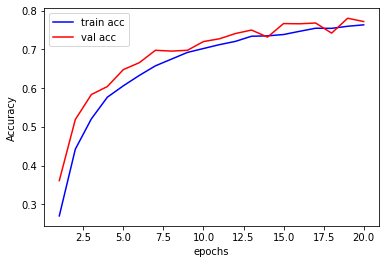

In [ ]:
plt.plot(epochs, history3.history['accuracy'],'b',label='train acc')
plt.plot(epochs, history3.history['val_accuracy'],'r', label='val acc')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

We can observe that both the curves for train and validation accuracy are similar and validation accuracy is slightly higher than train accuracy

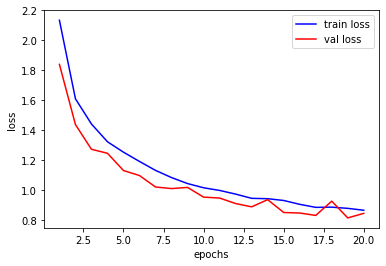

In [ ]:
plt.plot(epochs, history3.history['loss'],'b',label='train loss')
plt.plot(epochs, history3.history['val_loss'],'r', label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

We can observe that both the curves for train and validation loss are similar and validation loss is slightly lower than train loss.

So, It seems like there is no-overfitting with this model.


So, model 3 is better than model 1 and model 2

#Exe. 19 Based on your observations until now, can you get better results by modifying the model architecture, regularization or optimisation?





*   We can try to change hyperparameters like number of hidden layers or number of neurons in the hidden layers.
*   We can also try to change optimizer othen than "adam"
*   We can also try to use L1 or L1L2 regulaization both



